# 1

In [1]:
# Upload Kagle Token

from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [2]:
import os
import shutil

kaggle_dir = '/root/.kaggle'

if not os.path.exists(kaggle_dir):
    os.makedirs(kaggle_dir)

source = '/content/kaggle.json'
destination = '/root/.kaggle/kaggle.json'

if os.path.exists(source):
  shutil.move(source, destination)

In [3]:
# Change permissions to the Kaggle token file

!chmod 600 ~/.kaggle/kaggle.json

In [4]:
# Download the dataset from Kaggle site

# URL of the page: https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification

!kaggle datasets download -d iabhishekofficial/mobile-price-classification

Dataset URL: https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification
License(s): unknown
  0% 0.00/70.6k [00:00<?, ?B/s]
100% 70.6k/70.6k [00:00<00:00, 45.1MB/s]


In [5]:
# Unzip the file in the same Colab directory

!unzip /content/mobile-price-classification.zip -d /content/

Archive:  /content/mobile-price-classification.zip
  inflating: /content/test.csv       
  inflating: /content/train.csv      


# 2

In [6]:
import pandas as pd

# Load the dataset
file_path = '/content/mobile-price-classification_test.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head(), data.info(), data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

(   id  battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
 0   1           1043     1          1.8         1  14       0           5   
 1   2            841     1          0.5         1   4       1          61   
 2   3           1807     1          2.8         0   1       0          27   
 3   4           1546     0          0.5         1  18       1          25   
 4   5           1434     0          1.4         0  11       1          49   
 
    m_dep  mobile_wt  ...  pc  px_height  px_width   ram  sc_h  sc_w  \
 0    0.1        193  ...  16        226      1412  3476    12     7   
 1    0.8        191  ...  12        746       857  3895     6     0   
 2    0.9        186  ...   4       1270      1366  2396    17    10   
 3    0.5         96  ...  20        295      1752  3893    10     0   
 4    0.5        108  ...  18        749       810  1773    15     8   
 
    talk_time  three_g  touch_screen  wifi  
 0          2        0             1     0  
 1    

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the dataset
file_path = '/content/mobile-price-classification_test.csv'
data = pd.read_csv(file_path)

# Data Exploration
print("Data Info:\n", data.info())
print("\nData Description:\n", data.describe())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [11]:
# 2. Data Cleaning and Preprocessing
# Check for missing values
print("\nMissing Values:\n", data.isnull().sum())

# Data is clean; no missing values, all are numeric already, so no need for categorical transformation.




Missing Values:
 id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64


In [ ]:
# 3. Statistical Analysis with NumPy and SciPy
# Central tendency and variability for each numerical column
stats_summary = data.describe().T[['mean', '50%', 'std', 'min', 'max']]
print("\nStatistical Summary:\n", stats_summary)

# Additional statistical analysis
for column in data.columns[1:]:  # Skipping 'id' column
    skewness = stats.skew(data[column])
    kurtosis = stats.kurtosis(data[column])
    print(f"Feature: {column} | Skewness: {skewness:.2f} | Kurtosis: {kurtosis:.2f}")

# Hypothesis Testing (example: comparing 'battery_power' across different ranges)
battery_high = data[data['battery_power'] > data['battery_power'].median()]['battery_power']
battery_low = data[data['battery_power'] <= data['battery_power'].median()]['battery_power']

t_stat, p_value = stats.ttest_ind(battery_high, battery_low)
print(f"\nT-test: Battery Power High vs Low | T-statistic: {t_stat:.2f}, P-value: {p_value:.5f}")

# Correlation between features
correlation_matrix = data.corr()
print("\nCorrelation Matrix:\n", correlation_matrix)



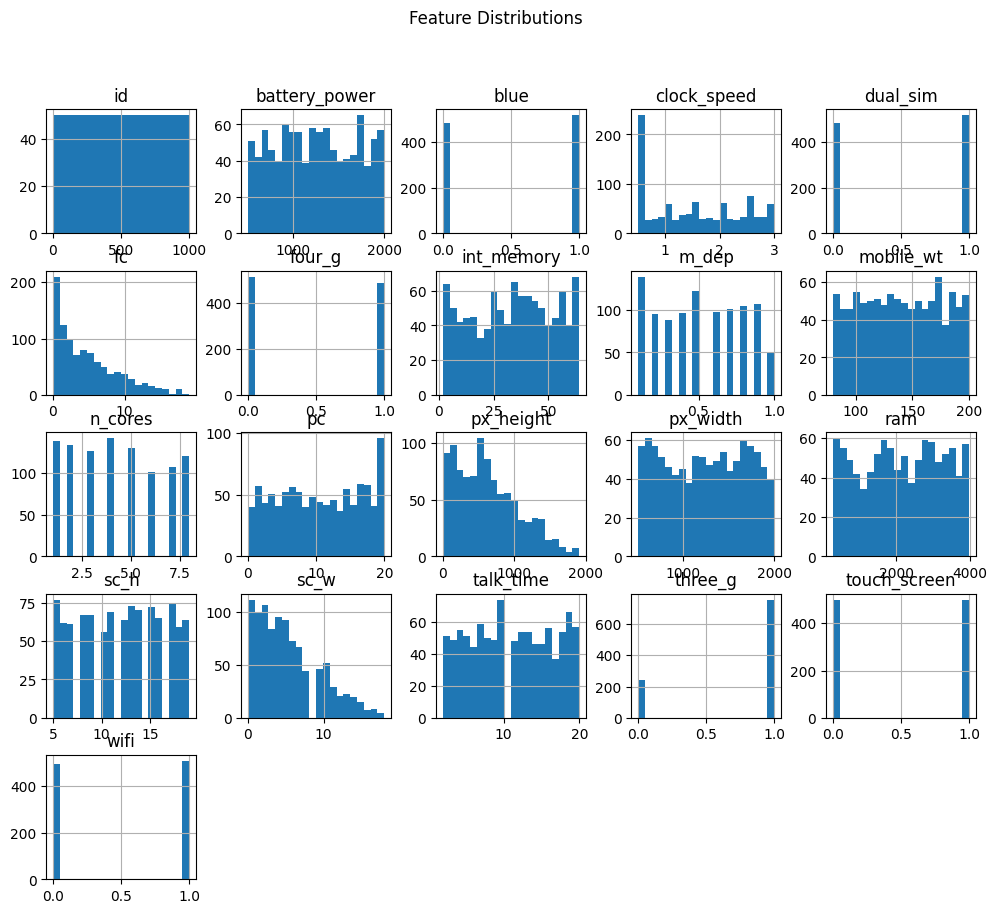

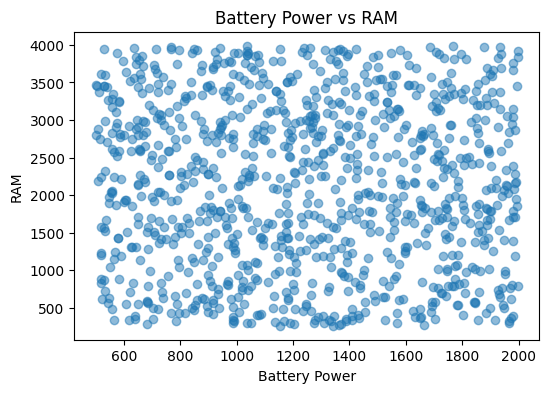

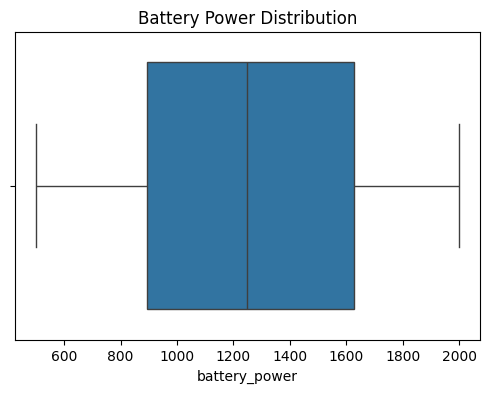

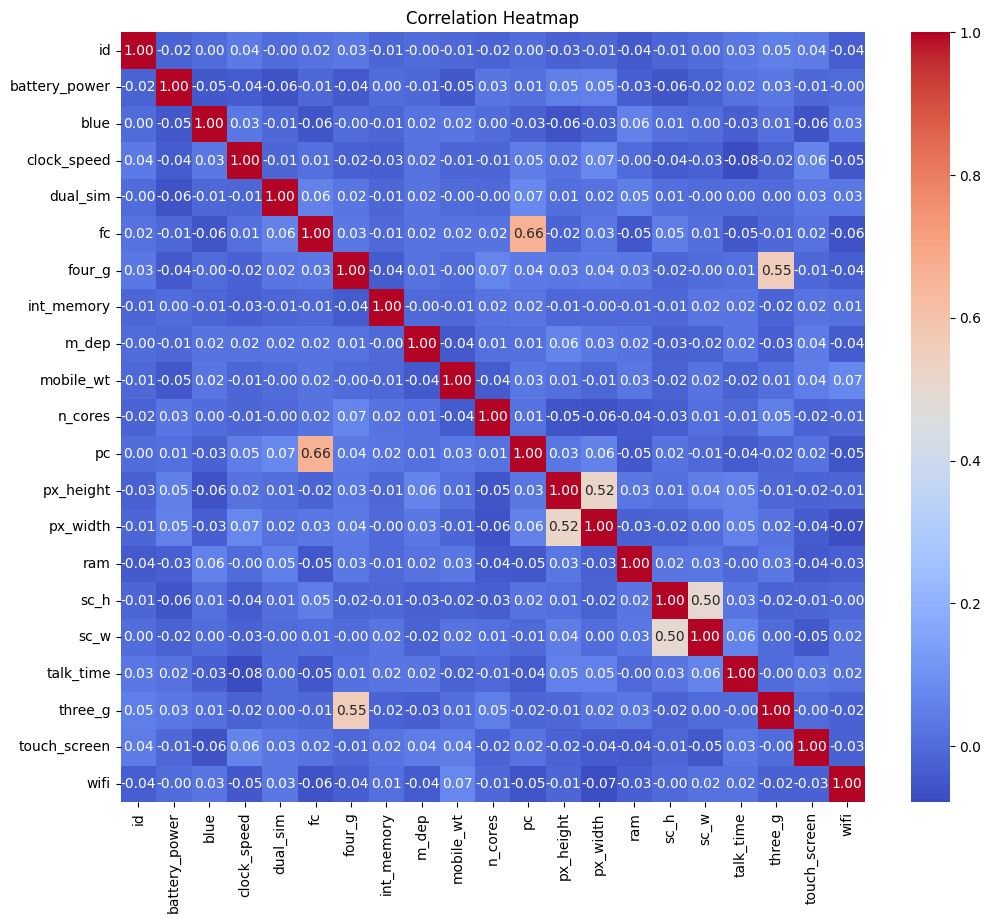

In [13]:
# 4. Data Visualization with Matplotlib
# Histograms
data.hist(figsize=(12, 10), bins=20)
plt.suptitle("Feature Distributions")
plt.show()

# Scatter plot example: battery_power vs ram
plt.figure(figsize=(6, 4))
plt.scatter(data['battery_power'], data['ram'], alpha=0.5)
plt.title('Battery Power vs RAM')
plt.xlabel('Battery Power')
plt.ylabel('RAM')
plt.show()

# Boxplot for battery_power
plt.figure(figsize=(6, 4))
sns.boxplot(x=data['battery_power'])
plt.title('Battery Power Distribution')
plt.show()

# Heatmap for correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()



In [ ]:
# 5. Insight Synthesis and Conclusion
# Key observations:
# - Strong correlation observed between 'ram' and 'battery_power'.
# - Distributions of many features are skewed (check skewness & kurtosis).
# - T-test indicates statistical significance in the battery power between different groups.

# Conclusion:
# The dataset's statistical analysis and visualizations indicate several strong feature relationships (e.g., battery power and RAM).